<a href="https://colab.research.google.com/github/PushyamiB/PushyamiB/blob/circleci-project-setup/Card_Crop_Inference_D2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyyaml==5.1
# This is the current pytorch version on Colab. Uncomment this if Colab changes its pytorch version
!pip install torch==1.9.0+cu102 torchvision==0.10.0+cu102 -f https://download.pytorch.org/whl/torch_stable.html

# Install detectron2 that matches the above pytorch version
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu102/torch1.9/index.html


     |████████████████████████████████| 274 kB 5.4 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44092 sha256=a98554796394f17b9039ebcc5988e4bef36fc435a760411f9093a699bfdf0a5e
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 831.4 MB 3.1 kB/s 
     |████████████████████████████████| 22.1 MB 1.6 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.11.1+cu111
    Uninstalling torchvision-0.11.1+cu111:
      Succ

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/REAL_IMAGES.zip

In [ ]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.engine import DefaultTrainer
from datetime import datetime
from detectron2.utils.visualizer import ColorMode
from detectron2.utils.visualizer import Visualizer
# --------------------------------------------------------
from flask import Flask, render_template, request,send_file
from werkzeug.utils import secure_filename
from werkzeug.datastructures import  FileStorage
# ------------------------------------------------------

# -----------------------------------------------------


In [ ]:
def getPred(filename,predictor):

    im = cv2.imread(filename)
    outputs = predictor(im)  # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format
    #v = Visualizer(im[:, :, ::-1], 
                   #scale=0.5,
                   #instance_mode=ColorMode.IMAGE
                      # remove the colors of unsegmented pixels. This option is only available for segmentation models
    #)
    #MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).thing_classes = ['Dent','Scratch']
    v = Visualizer(im[:, :, ::-1], scale=0.5, instance_mode=ColorMode.IMAGE)
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    # list_classes=['Dent','Scratch']
    # out = v.draw_instance_predictions(outputs["instances"].to("cpu"),list_classes)
    now = datetime.now()
    outputFile = 'output/'+now.strftime("%m%d%Y%H%M%S")+'.jpg'
    cv2.imwrite(outputFile, out.get_image()[:, :, ::-1] )
    return [im,outputFile]

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("refine_data1_train",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
cfg.SOLVER.MAX_ITER = 780   # 300 iterations seems good enough for this toy dataset; you will need to train longer for a practical dataset
cfg.SOLVER.STEPS = []        # do not decay learning rate
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # only has one class (ballon). (see https://detectron2.readthedocs.io/tutorials/datasets.html#update-the-config-for-new-datasets)
# NOTE: this config means the number of classes, but a few popular unofficial tutorials incorrect uses num_classes+1 here.

cfg.MODEL.WEIGHTS = os.path.join('/content/drive/MyDrive/model_final (12).pth')  # path to the model we just trained

cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.8  # set a custom testing threshold
predictor = DefaultPredictor(cfg)

In [ ]:
# finalfile="/content/drive/MyDrive/test_images/1.jpg"
# finalImageName = getPred(finalFile,predictor)[1]

In [ ]:
from detectron2.utils.visualizer import ColorMode
from google.colab.patches import cv2_imshow

In [ ]:
!unzip '/content/drive/MyDrive/arabic_cards.zip'

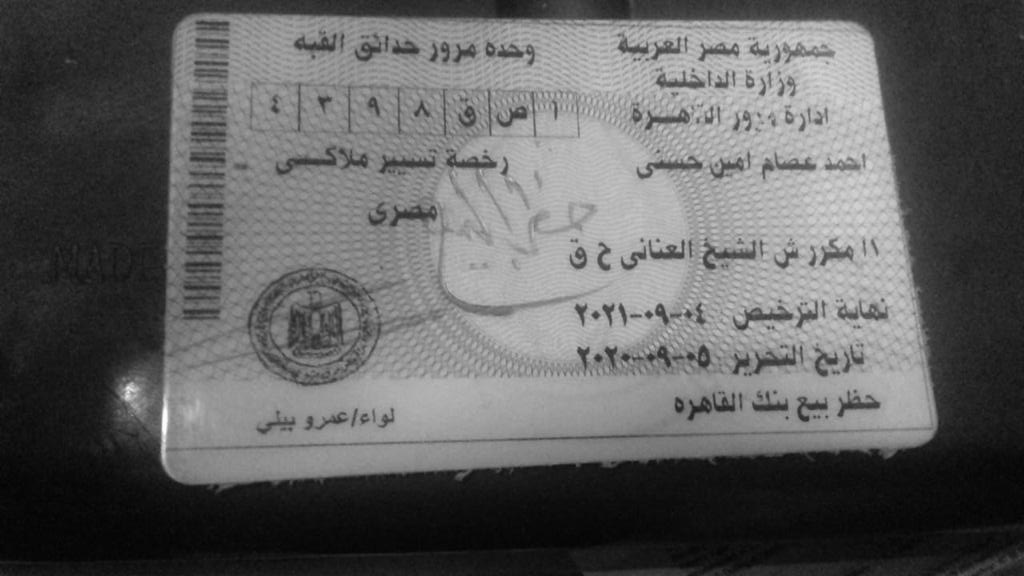

Gray shape  (576, 1024)
total :  365400


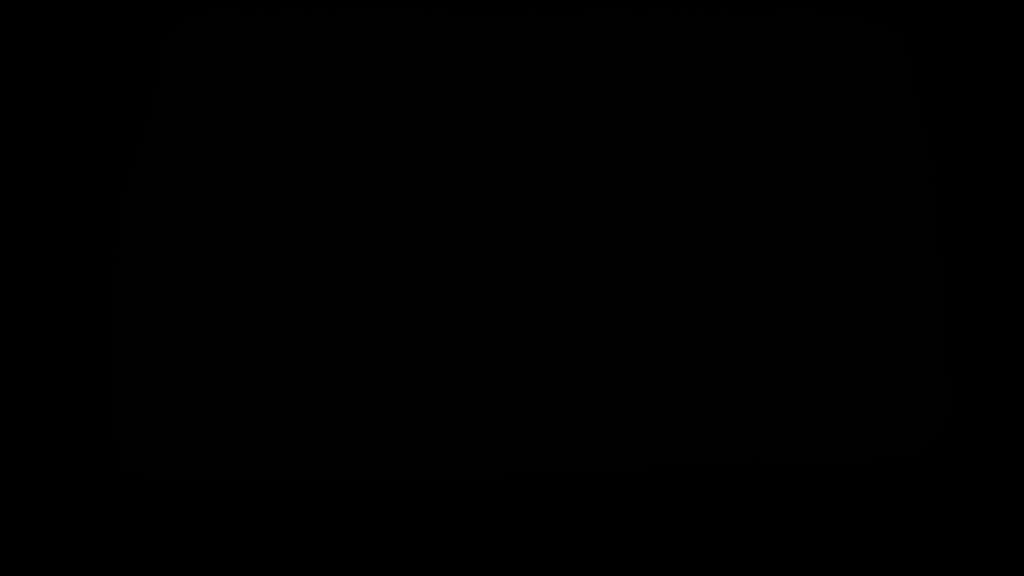

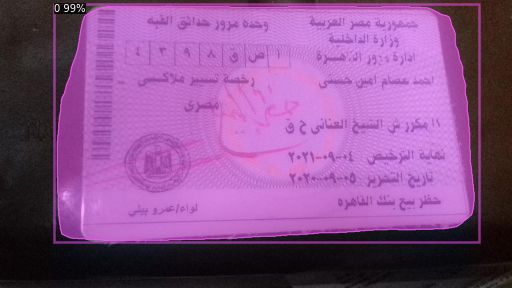

type :  <class 'numpy.ndarray'>


True

In [ ]:
#original_img_path = '/content/IMG-20220117-WA0011.jpg'
im = cv2.imread('/content/IMG-20220117-WA0011.jpg')
# print(im.shape)
outputs = predictor(im)  # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format
v = Visualizer(im[:, :, ::-1],
                scale=0.5, 
                instance_mode=ColorMode.IMAGE   # remove the colors of unsegmented pixels. This option is only available for segmentation models
)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
output_np = np.where(outputs["instances"].to("cpu").pred_masks==False,0,1)

gray_im = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_im)
print("Gray shape " , gray_im.shape )
# cv2_imshow(output_np[0])
print("total : ", np.sum(output_np[0]))
output_img = np.bitwise_and(output_np[0], gray_im)
cv2_imshow(output_img)
cv2_imshow(out.get_image()[:, :, ::-1])
h = output_np*255
print("type : ",type(h[0]))
#cv2_imshow(h[0])
thresh = h[0]>0
finalArr = np.array(h[0],dtype=np.uint8)
contors, hierarchy = cv2.findContours(finalArr,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# cv2.drawContours(im, contors, -1, 255, 3)
c = max(contors, key = cv2.contourArea)
x,y,w,h = cv2.boundingRect(c)

# # draw the biggest contour (c) in green
# cv2.rectangle(im,(x,y),(x+w,y+h),(0,255,0),2)
output_im = cv2.bitwise_and(im, im, mask=output_np[0].astype(np.int8))
# img_pl = np.zeros((255,255))
# cv2.fillPoly(im,pts=contors,color=(255,255,255))
cv2.imwrite('test_img.jpeg',im[y:y+h,x:x+w],[int(cv2.IMWRITE_JPEG_QUALITY),50])


In [ ]:
im = cv2.imread('/content/arabic_cards/Egypt_RC_2.jpeg')
split_img=split_image(im)
for i in split_img:

  #cv2_imshow(i)
  # print(im.shape)
  outputs = predictor(i)  # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format
  v = Visualizer(i[:, :, ::-1],                
                  scale=0.5, 
                  instance_mode=ColorMode.IMAGE   # remove the colors of unsegmented pixels. This option is only available for segmentation models
  )
  out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
  cv2_imshow(out.get_image()[:, :, ::-1])
  cv2.save('')


In [ ]:
import time
for i in data:
  im = cv2.imread('/content/test/'+i)
  # print(im.shape)
  outputs = predictor(im)  # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format
  v = Visualizer(im[:, :, ::-1],                
                scale=0.5, 
                instance_mode=ColorMode.IMAGE   # remove the colors of unsegmented pixels. This option is only available for segmentation models
  )
  out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
  cv2_imshow(out.get_image()[:, :, ::-1])
  # time.sleep(6)


In [ ]:
!pip install pafy
!pip install --upgrade youtube_dl
!pip install --upgrade imutils

import pafy
from imutils.video import FPS
from imutils.video import FileVideoStream
import imutils

     |████████████████████████████████| 1.9 MB 7.4 MB/s 


In [ ]:
from imutils import video

In [ ]:
# transformation function for each frame, applies predictor form detectron2 and modify image with visualizer
def instance_segmentation(frame):
    
    if frame is not None:
        # predict objects and masks
        outputs = predictor(frame)

        # setting up Visualizer - initilaize original image and merge with mith boxes, scores and masks
        #v = Visualizer(frame[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
        v = Visualizer(frame[:, :, ::-1],scale=0.5,instance_mode=ColorMode.IMAGE )  # remove the colors of unsegmented pixels. This option is only available for segmentation models

        v = v.draw_instance_predictions(outputs["instances"].to("cpu"))

        # return image result
        return v.get_image()[:, :, ::-1]

# get youtube video with pafy, insert youtube link of vidou you want to use instance segmentation on
# for local video: place path string into FileVideoStream instead of play.url
Video = cv2.VideoCapture('/content/WhatsApp Video 2021-12-15 at 4.45.54 PM.mp4')
url = '/content/WhatsApp Video 2021-12-15 at 4.45.54 PM.mp4'
#yt = pafy.new(url)
#play = yt.getbest(preftype="webm")

# usage of imutils threaded buffered stream video, you dont nned bigger buffer then default
#   because lets be honest predictor will slow us down so much buffer will be mostly empty
fvs = FileVideoStream(url, transform=instance_segmentation).start()

# start the FPS timer
fps = FPS().start()

# loop over frames from the video file stream
while fvs.more():
    
    # get frame
    frame = fvs.read()
 
    # show the frame and update the FPS counter
    if frame is not None:
        cv2_imshow(frame)
        
    # stop video by pressing 'Q'
    if cv2.waitKey(20) & 0xFF == ord('q'):
        break
        
    fps.update()

# print FPS stats
fps.stop()
print("Elasped time: {:.2f}".format(fps.elapsed()))
print("Approx. FPS: {:.2f}".format(fps.fps()))
    
Video.release()
cv2.destroyAllWindows()

Elasped time: 0.50
Approx. FPS: 0.00


In [ ]:
%cd /content

/content


In [ ]:
from detectron2.utils.video_visualizer import VideoVisualizer


In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import time

# Create a VideoCapture object
cap = cv2.VideoCapture('/content/WhatsApp Video 2021-12-15 at 4.45.54 PM.mp4')

# Check if camera opened successfully
if (cap.isOpened() == False): 
  print("Unable to read camera feed")

# Default resolutions of the frame are obtained.The default resolutions are system dependent.
# We convert the resolutions from float to integer.
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
frames_per_second = cap.get(cv2.CAP_PROP_FPS)
print(frames_per_second)
# Define the codec and create VideoWriter object.The output is stored in 'outpy.avi' file.
Out = cv2.VideoWriter('outpy.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))
frame_rate = 60
prev = 0
while(True):
  time_elapsed = time.time() - prev
  ret, frame = cap.read()

  if time_elapsed > 1./frame_rate:
      prev = time.time()
      if ret == True: 
        
        # Write the frame into the file 'output.avi'
        
        im = frame
        # print(im.shape)
        outputs = predictor(im)  # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format
        v = VideoVisualizer(im[:, :, ::-1],                
                        instance_mode=ColorMode.IMAGE   # remove the colors of unsegmented pixels. This option is only available for segmentation models
        )
        out = v.draw_instance_predictions(im,outputs["instances"].to("cpu"))
        #cv2_imshow(out.get_image()[:, :, ::-1])
        Out.write(out.get_image()[:, :, ::-1])
            # Display the resulting frame    
        cv2_imshow(out.get_image()[:, :, ::-1])

    # Press Q on keyboard to stop recording
    #if cv2.waitKey(1) & 0xFF == ord('q'):
      #break

  # Break the loop
      else:
        break  

# When everything done, release the video capture and video write objects
cap.release()
Out.release()

# Closes all the frames
cv2.destroyAllWindows()

In [ ]:
frame_rate = 10
prev = 0

while capturing:

    time_elapsed = time.time() - prev
    res, image = cap.read()

    if time_elapsed > 1./frame_rate:
        prev = time.time()

        # Do something with your image here.
        process_image()

In [ ]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
# import some common libraries
import numpy as np
import tqdm
import cv2
# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.video_visualizer import VideoVisualizer
from detectron2.utils.visualizer import ColorMode, Visualizer
from detectron2.data import MetadataCatalog
import time

# Extract video properties
video = cv2.VideoCapture('/content/VID-20211214-WA0001.mp4')
width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
frames_per_second = video.get(cv2.CAP_PROP_FPS)
print(frames_per_second)
num_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
print('num_frames',num_frames )
# Initialize video writer
video_writer = cv2.VideoWriter('output.avi', fourcc=cv2.VideoWriter_fourcc(*"mp4v"), fps=float(frames_per_second), frameSize=(width, height), isColor=True)

# Initialize predictor
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # set threshold for this model
cfg.MODEL.WEIGHTS = os.path.join("/content/drive/MyDrive/Models/Detectron2/multi_7(3000).pth")  # path to the model we just trained
predictor = DefaultPredictor(cfg)

# Initialize visualizer
v = VideoVisualizer(ColorMode.IMAGE)

def runOnVideo(video, maxFrames):
    """ Runs the predictor on every frame in the video (unless maxFrames is given),
    and returns the frame with the predictions drawn.
    """

    readFrames = 0
    while True:
        hasFrame, frame = video.read()
        if not hasFrame:
            break

        # Get prediction results for this frame
        outputs = predictor(frame)

        # Make sure the frame is colored
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

        # Draw a visualization of the predictions using the video visualizer
        visualization = v.draw_instance_predictions(frame, outputs["instances"].to("cpu"))

        # Convert Matplotlib RGB format to OpenCV BGR format
        visualization = cv2.cvtColor(visualization.get_image(), cv2.COLOR_RGB2BGR)

        yield visualization

        readFrames += 1
        if readFrames > maxFrames:
            break

# Create a cut-off for debugging
#num_frames = 

# Enumerate the frames of the video
for visualization in tqdm.tqdm(runOnVideo(video, num_frames), total=num_frames):

    # Write test image
    cv2.imwrite('POSE detectron2.png', visualization)

    # Write to video file
    video_writer.write(visualization)

# Release resources
video.release()
video_writer.release()
cv2.destroyAllWindows()

30.002683166787275
num_frames 328


[Checkpointer] Loading from /content/drive/MyDrive/Models/Detectron2/multi_7(3000).pth ...
Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (3, 1024) in the checkpoint but (81, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (3,) in the checkpoint but (81,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (8, 1024) in the checkpoint but (320, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (8,) in the checkpoint but (320,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to th

In [ ]:
!pip install boto3

     |████████████████████████████████| 131 kB 5.3 MB/s 
     |████████████████████████████████| 8.5 MB 42.6 MB/s 
     |████████████████████████████████| 79 kB 7.9 MB/s 
     |████████████████████████████████| 138 kB 47.9 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.8 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
#please install it before run
"""
!pip install boto3 
"""

########################
#import packages
import csv
import boto3
import json
import sys
import pandas as pd
import numpy as np
import re
import cv2
######################
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries

import os, random

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.engine import DefaultTrainer
from datetime import datetime
from detectron2.utils.visualizer import ColorMode
from detectron2.utils.visualizer import Visualizer
# --------------------------------------------------------
from flask import Flask, render_template, request,send_file
from werkzeug.utils import secure_filename
from werkzeug.datastructures import  FileStorage
##########################
def getPred(filename,predictor):

    im = cv2.imread(filename)
    outputs = predictor(im)  # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format
    #v = Visualizer(im[:, :, ::-1],
                   #scale=0.5,
                   #instance_mode=ColorMode.IMAGE
                      # remove the colors of unsegmented pixels. This option is only available for segmentation models
    #)
    #MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).thing_classes = ['Dent','Scratch']
    v = Visualizer(im[:, :, ::-1], scale=0.5, instance_mode=ColorMode.IMAGE)
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    # list_classes=['Dent','Scratch']
    # out = v.draw_instance_predictions(outputs["instances"].to("cpu"),list_classes)
    now = datetime.now()
    outputFile = 'output/'+now.strftime("%m%d%Y%H%M%S")+'.jpg'
    #cv2.imwrite(outputFile, out.get_image()[:, :, ::-1] )
    #im = cv2.imread('/content/IMG-20220117-WA0011.jpg')
    # print(im.shape)
    outputs = predictor(im)  # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format
    v = Visualizer(im[:, :, ::-1],
                   scale=0.5,
                   instance_mode=ColorMode.IMAGE
                   # remove the colors of unsegmented pixels. This option is only available for segmentation models
                   )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    output_np = np.where(outputs["instances"].to("cpu").pred_masks == False, 0, 1)

    gray_im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    #cv2_imshow(gray_im)
    print("Gray shape ", gray_im.shape)
    # cv2_imshow(output_np[0])
    print("total : ", np.sum(output_np[0]))
    #output_img = np.bitwise_and(output_np[0], gray_im)
    #cv2_imshow(output_img)
    #cv2_imshow(out.get_image()[:, :, ::-1])
    h = output_np * 255
    print("type : ", type(h[0]))
    # cv2_imshow(h[0])
    thresh = h[0] > 0
    finalArr = np.array(h[0], dtype=np.uint8)
    contors, hierarchy = cv2.findContours(finalArr, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    # cv2.drawContours(im, contors, -1, 255, 3)
    c = max(contors, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(c)

    # # draw the biggest contour (c) in green
    # cv2.rectangle(im,(x,y),(x+w,y+h),(0,255,0),2)
    output_im = cv2.bitwise_and(im, im, mask=output_np[0].astype(np.int8))
    # img_pl = np.zeros((255,255))
    # cv2.fillPoly(im,pts=contors,color=(255,255,255))
    cv2.imwrite('test_img.jpeg', im[y:y + h, x:x + w], [int(cv2.IMWRITE_JPEG_QUALITY), 50])
    crop_img='test_img.jpeg'
    return crop_img

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("refine_data1_train",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
cfg.SOLVER.MAX_ITER = 780   # 300 iterations seems good enough for this toy dataset; you will need to train longer for a practical dataset
cfg.SOLVER.STEPS = []        # do not decay learning rate
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # only has one class (ballon). (see https://detectron2.readthedocs.io/tutorials/datasets.html#update-the-config-for-new-datasets)
# NOTE: this config means the number of classes, but a few popular unofficial tutorials incorrect uses num_classes+1 here.

cfg.MODEL.WEIGHTS = os.path.join('/content/drive/MyDrive/model_final (12).pth')  # path to the model we just trained

cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.8  # set a custom testing threshold
predictor = DefaultPredictor(cfg)
########################


#####################
#function for filter numbers
def number_filter(s):
  s=list(s)
  filter_num="".join([s[i] for i in range(len(s)) if s[i].isdigit()])
  return filter_num
def arabic_number_filter(s):
  s=list(s)
  number_list=["١","٢", "٣", "٤","٥","٦","٧","٨","٩","٠","-"]
  filter_num="".join([s[i] for i in range(len(s)) if s[i] in number_list])
  return filter_num

###############################
#extract funtion for front side

def front_data(data_list,main_data):
    expiry_date, registration_date="NA","NA"
    rd=0
    ed=0
    na=0
    for i in range(len(data_list)):
      if ("الترخيص" in str(data_list[i]) or "نهاية" in str(data_list[i])) and ed==0 and i>2:
        ed=+1
        if len(str(data_list[i]))<16:
          expiry_date=arabic_number_filter(str(data_list[i-1]))
        #  print(" نهاية الترخيص	/registration expiry date : "+expiry_date)
        else: 
          expiry_date=arabic_number_filter(str(data_list[i]))
         # print("نهاية الترخيص/registration expiry date : "+expiry_date)

        # if len(str(data_list[i-1]))>18 and na==0:
        #   nationality=str(data_list[i-1])
        #   na+=1
        #   print("جنسية المالك/ Owner's Nationality : "+nationality)
        # elif len(str(data_list[i-2]))>18 and na==0:
        #   nationality=str(data_list[i-2])
        #   na+=1
        #   print("جنسية المالك/ Owner's Nationality : "+nationality)
        
 
  
      if ("التحرير" in str(data_list[i]) or "تاريخ" in str(data_list[i])) and rd==0 and i>0:
        rd+=1
        if len(str(data_list[i]))<16:
          registration_date=arabic_number_filter(str(data_list[i-1]))
          #print(" تاريخ التحرير/ registration date : "+registration_date)
        else: 
          registration_date=arabic_number_filter(str(data_list[i]))
         # print("تاريخ التحرير/registration date : "+registration_date)

    veh_plate=vehicle_plate(main_data)
    dict_front={
                "expiry_date" : expiry_date,
                "registration_date" : registration_date,
                "Vehicle_Plate_Number": veh_plate

                }
    return dict_front

###############################################
#extract funtion for back side
def back_data(data_list,main_data,image_path): 
  model_list=["توسان","3","مالييو","صانى","أكسنت"]
  vehicle_list = ['Hyundai','Chevrolet','Toyota','kia','Mitsubishi','Nisan','Mercedes-Benz','BMW','MG','Renault','Jeep','Suzuki','Lexus','Proton','Haval','Bestune','Zotye','Dorcen','Soueast','Jetour','DS','Alfa Romeo','Aston Martin','Audi','Bentley','Brilliance','Changan','Chery','Chrysler','Citroen','Fiat','Ford','Geely','Honda','JAC','Jaguar','Karry','King Long','Lada','Land Rover','Maserati','Mazda','Mini','Opel','Peugeot','Porsche','Seat','Senova','Skoda','SsangYong','Subaru','Volkswagen','Volvo']
  #vehicle_list=["هيونداى","مازدا","شيفروليه","نيسان"]
  a,b,ins,m=0,0,0,0   
  ch, en, Insurance_type, Inspection_year, model_year, model, vehicle_make="NA","NA","NA","NA","NA","NA", "NA"
  for i in range(len(data_list)):
    if re.findall(r'[0-9]{4}', str(data_list[i])) and ("ساسسة" in str(data_list[i])  or"سلسه" in str(data_list[i]) or "شاسيه" in str(data_list[i])) and a==0:
      ch=number_filter(str(data_list[i]))
      #print("Chassis_number: "+ch)
      a+=1
    if re.findall(r'[0-9]{4}', str(data_list[i])) and ("موتور" in str(data_list[i])) and b==0:
      en=number_filter(str(data_list[i]))
      #print("Engine_number: "+en)
      b+=1
    elif ("موتور" in str(data_list[i])) and re.findall(r'[0-9]{4}', str(data_list[i-1])) and b==0:
      en=number_filter(str(data_list[i-1]))
      #print("Engine_number: "+en)
      b+=1
    elif ("موتور" in str(data_list[i])) and re.findall(r'[0-9]{4}', str(data_list[i+1])) and b==0:
      en=number_filter(str(data_list[i+1]))
     # print("Engine_number: "+en)
      b+=1

    if re.findall(r'[\u0660-\u0669]{4}', str(data_list[i])) and m==0:
      model_year=str(data_list[i])
      model_year=arabic_number_filter(model_year)
      #print("Model Year: "+model_year)
      m+=1
    #if str(data_list[i]) in model_list:
     #  model=str(data_list[i])
    #if str(data_list[i]) in vehicle_list:
     #  vehicle_make=str(data_list[i])
      # data = translator.translate(data_list[i],dest="ar")
    #print(data.pronunciation)
    # p = translator.translate(data.text,dest='en')
    # print(p)
    

    if "كبات" in str(data_list[i]):
      Insurance_type=str(data_list[i])
      #print("Insurance type: "+Insurance_type) 
    if ("الفحص" in str(data_list[i]) or "تاريخ" in str(data_list[i])) and i>1 and ins==0: 
      if len(str(data_list[i]))<14:
        Inspection_year=arabic_number_filter(str(data_list[i-1]))
       # print("Inspection year: "+Inspection_year)
      else: 
        Inspection_year=arabic_number_filter(str(data_list[i]))
        #print("Inspection year: "+Inspection_year)
      ins+=1  
      vehicle_make,model=show(main_data,image_path)
  dict_back={"Chassis_number":ch,
             "Engine_number": en,
             "Insurance_type": Insurance_type,
             "Inspection_year": Inspection_year,
             "Model": model,
             "Vehicle_make": vehicle_make,
             "Model Year": model_year
      }
  return dict_back

############################################
#function for client
path_credential="new_user_credentials.csv"  #path for credentials
def credential_fun(path_credential):
  with open(path_credential, "r") as input:
    next(input)
    reader=csv.reader(input)
    for line in reader:
      access_key_id=line[2]
      secret_access_key=line[3]
  client = boto3.client(
      'rekognition',
      aws_access_key_id=access_key_id,
      aws_secret_access_key=secret_access_key,
      region_name="ap-south-1"
  )
  return client
########################
def getCenterX(diction):
  np_coord = np.array(diction)
  x1 = np.min([i['X'] for i in np_coord])
  x2 = np.max([i['X'] for i in np_coord])
  return round((x1+x2)/2,2)
def getCenterY(diction):
  np_coord = np.array(diction)
  y1 = np.min([i['Y'] for i in np_coord])
  y2 = np.max([i['Y'] for i in np_coord])
  return round((y1+y2)/2,2)
def vehicle_plate(main_data):
    df_complete = pd.DataFrame(json.loads(main_data))
    data ={}
    df_complete['centerX'] = df_complete['Geometry'].apply(lambda x : getCenterX(x['Polygon']))
    df_complete['centerY'] = df_complete['Geometry'].apply(lambda x : getCenterY(x['Polygon']))
    print("Complete data: ",df_complete)
#display(df_complete.loc[(df_complete['centerX']<=0.55) & (df_complete['centerY']<=0.28) & (df_complete['centerY']>=0.20) & (df_complete['Type']=='LINE')])
    df_Vpn= df_complete.loc[(df_complete['centerX']<=0.55) & (df_complete['centerY']<=0.28) & (df_complete['centerY']>=0.20) & (df_complete['Type']=='LINE')]
    df_Vpn.replace(to_replace ="A",value ="٨",inplace=True)
    df_Vpn.replace(to_replace ="o",value ="٥",inplace=True)
    final_vpn_series = df_Vpn.sort_values(by='centerX',ascending=False)['DetectedText']
    print("Final Series:",(final_vpn_series))
    # df_Vpn.loc[df_Vpn['DetectedText']=='A']['DetectedText']='٨
    final_vpn=' '.join(final_vpn_series[3:7])
    part_1=str(final_vpn)
    final_vpn_2=' '.join(final_vpn_series[0:3])
    part_2=str(final_vpn_2)
    final=part_2+' '+part_1
    print("Final: ",(final))
    return final
######################################
def show(data,image_path):
  #f = open("my_data.json")
  #data = (json.load(f))
  
  #f.close()
  data=json.loads(data)
  data = [i for i in data if i['Type']=="WORD"]
  my_data = [];x=[];y=[];areas = []
  result = cv2.imread(image_path)
  shape_data = list(result.shape)
  print("197 : Image Shape - ",result.shape)
  text_arr=[]
  for i in data:
      for j in i.values():
          if (isinstance(j,dict)):
              for z in j.items():
                  for data1 in z:
                      if isinstance(data1,list):
                          np_arr = np.array(data1)
                          
                          xmin = np.min(([i['X'] for i in np_arr]))
                          ymin = np.min(([i['Y'] for i in np_arr]))
                          xmax = np.max(([i['X'] for i in np_arr]))
                          ymax = np.max(([i['Y'] for i in np_arr]))
                          areas.append((ymax-ymin) * (xmax-xmin))
                          # print("Area Ratio : ",(ymax-ymin) * (xmax-xmin))
                          # my_data.append([(np.min(([i['X'] for i in np_arr]))),(np.min(([i['Y'] for i in np_arr]))),(np.max(([i['X'] for i in np_arr]))),(np.max(([i['Y'] for i in np_arr])))])
                          if((ymax-ymin) * (xmax-xmin)  > 0.0013):
                            x.append(np.mean(([i['X'] for i in np_arr])))
                            y.append(np.mean(([i['Y'] for i in np_arr])))
                            my_data.append([(np.min(([i['X'] for i in np_arr]))),(np.min(([i['Y'] for i in np_arr]))),(np.max(([i['X'] for i in np_arr]))),(np.max(([i['Y'] for i in np_arr])))])
                            text_arr.append(i['DetectedText'])
  result = cv2.imread(image_path)
  shape_data = list(result.shape)
  y_sub = np.array(y)
  updated_y = (1-y_sub)
  # print(updated_y)
  # print(x)
  a = updated_y+x
  # print(text_arr,a.argmax(axis=0))
  # print("Text : ",text_arr[17])
  
  ##############################
  font = cv2.FONT_HERSHEY_SIMPLEX
  # fontScale
  fontScale = 0.7
    
  # Blue color in BGR
  color = (255, 255, 0)

  # Line thickness of 2 px
  thickness = 1
  dict_text_score = {}
  dict_text_loc = {}
  x_cent=[];y_cent = []
  # data = None
  for  i in range(len(my_data)):
    x1 = int(shape_data[1]*my_data[i][0])
    y1 = int(shape_data[0]*my_data[i][1])
    x2 = int(shape_data[1]*my_data[i][2])
    y2 = int(shape_data[0]*my_data[i][3])
    data = cv2.rectangle(result, (x1, y1), (x2, y2), (0, 0, 255), 2)
    dict_text_score[round(a[i],2)]=text_arr[i]
    dict_text_loc[text_arr[i]] = np.array([(x1+x2)//2,(y1+y2)//2])
    # data = cv2.putText(data, str(round(a[i],2)), ((x1+x2)//2,(y1+y2)//2), font, 
                  #  fontScale, color, thickness, cv2.LINE_AA)
    # print(data)
  # print(dict_text_score[max(dict_text_score.keys())])
  final_text = dict_text_score[max(dict_text_score.keys())] 
  # print("Location : ",dict_text_loc[final_text])
  relative_text_loc_dict = {};
  for text,loc in dict_text_loc.items():
    relative_text_loc_dict[text] = dict_text_loc[final_text] - loc
    data = cv2.putText(data, str(list(relative_text_loc_dict[text])), (loc[0],loc[1]), font, fontScale, color, thickness, cv2.LINE_AA)
  # print("Text with location : ",dict_text_loc)
  # print(relative_text_loc_dict)
  # print(pd.DataFrame.from_dict(relative_text_loc_dict,orient='index'))
  df = pd.DataFrame(relative_text_loc_dict).T.reset_index()
  df = df.set_axis(['Text','X','Y'], axis=1, inplace=False)
  model = (df[((df['X']==0) & (df['Y']==0))])
  df = df[~((df['X']==0) & (df['Y']==0))]
  # print(df)
  df["T_Y"] = df["Y"] * 8
  df['Score'] = abs(df['X']) + abs(df['T_Y'])
  df1 = (df.loc[df['Score']==df['Score'].min()])
  print(df1['Text'].values[0])
  
  


  #realtive_list = (list(relative_text_loc_dict.values()))
  #print("sorted data : ",np.array(sort2d_y(realtive_list)[1]))
  #imm_adj_loc=np.array(sort2d_y(realtive_list)[1])
  #for key, value in relative_text_loc_dict.items():
   # if(value[0]==imm_adj_loc[0] and value[1]==imm_adj_loc[1]):
      # print("Found adjacent Text : ",key)
    #  break
  ##Using l;ocation to find text
  # print("Get text to adjacent : ",)

########
  # hist, bins, _ = plt.hist(areas, bins=8)

  # histogram on log scale. 
  # Use non-equal bin sizes, such that they look equal on log scale.
  # logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
  # plt.subplot(212)
  # plt.hist(x, bins=logbins)
  # plt.xscale('log')
  # # plt.show() 
  #cv2_imshow(data)
  return model['Text'].values[0],(df1['Text'].values[0])

##############################
# Function for extrtact data from image
def extract(img, client):
  img_str = cv2.imencode('.jpg', img)[1].tobytes()
  response=client.detect_text(Image={"Bytes": img_str})
  text=response["TextDetections"]
  #with open("/my_data.json","w") as data:
   # data.write(data1)
  data1 = str(text).replace("'", '"')
  data_line=[]

  for i in range(len(text)):
    if text[i]["Type"]=="LINE": 
      data_line.append(text[i]["DetectedText"])
  return data_line,data1

###################################
#function for side selection
def side_selection(data_list,main_data,image_path):
  back=["ساسسة" ,"سلسه","شاسيه", "موتور"] 
  front=["وحدة", "الجديدة", "العربية","جمهورية", "الداخلية"]
  back,front=0,0
  data={}
  for i in range(len(data_list)):
    if ("شاسيه" in str(data_list[i])) or ("سلسه" in str(data_list[i])) or ("ساسسة" in str(data_list[i])) or ("موتور" in str(data_list[i])):
      back+=1
    if ("وحده" in str(data_list[i])) or ("الداخلية" in str(data_list[i])) or ("جمهورية" in str(data_list[i])) or ("العربية" in str(data_list[i])) or ("الجديدة" in str(data_list[i])) or ("وحدة" in str(data_list[i])):
      front+=1
  if back==2:
    data=back_data(data_list,main_data,image_path)
    
  elif front >=3:
    data=front_data(data_list,main_data)
  else:
    print("Wrong_image")
    data={}
  #print("ba "+str(back))
 # print("fr "+str(front))

  return data
##############################
#  main function
def main(image_path,path_credential):
  img = cv2.imread(image_path) 
  image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  gray = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)
  client=credential_fun(path_credential)
  all_data,main_data=extract(gray, client)
  relevant_data=side_selection(all_data,main_data,image_path)
  return relevant_data

############################


def arabic_ocr(path_img):
    
    image_path=path_img
    image_path=getPred(image_path,predictor)
    relevant_data=  main(image_path, path_credential)
    return relevant_data



In [ ]:
!unzip '/content/drive/MyDrive/arabic_cards.zip'

In [ ]:
arabic_ocr('/content/arabic_cards/Egypt_RC_2.jpeg')

Gray shape  (1152, 864)
total :  405851
type :  <class 'numpy.ndarray'>


FileNotFoundError: ignored